In [1]:
import numpy as np
from sklearn.datasets import make_friedman2, make_regression
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import train_test_split
from xgboost import XGBRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_boston
from sklearn.feature_selection import SelectKBest, f_classif

In [4]:
data = pd.read_csv('data/dataset.csv')
y = data[['VST_AGE_YEARS']]
X = data.drop(['VST_AGE_YEARS'], axis=1)
X.head()

,DW_PET_VST_ID,GENDER,MIXED_BREED_FLAG,BREED,ALB,ALKP,ALT,AMYL,BUN,CA,...,MCV,MONOCYTE,MPV,PHOS,PLT,RBC,RDW,TBIL,TP,WBC
0,124765525,Spayed Female,1.0,Maine Coon,2.8,33.0,62.0,821.0,22.0,9.4,...,47.0,6.7,9.75,6.1,161.0,6.19,12.100000,0.2,8.1,26.940001
1,82934680,Neutered Male,2.0,DLH,3.7,25.0,66.0,683.0,27.0,10.8,...,47.0,3.0,10.36,3.7,324.0,8.80,14.900000,1.2,7.7,4.050000
2,141286179,Spayed Female,2.0,DMH,2.9,178.0,61.0,542.0,29.0,11.1,...,45.0,0.0,12.34,9.2,NaN,7.58,16.139999,0.1,6.3,15.560000
3,71394196,Neutered Male,2.0,DMH,3.3,101.0,48.0,467.0,22.0,10.8,...,NaN,NaN,NaN,6.9,NaN,NaN,NaN,0.3,7.1,NaN
4,90762118,Spayed Female,2.0,DSH,3.6,40.0,167.0,625.0,22.0,10.5,...,39.0,5.0,11.00,5.4,322.0,11.16,16.000000,0.6,6.5,7.800000


In [5]:
X_train_pre = pd.read_csv('data/X_train_pre.csv')
X_test_pre = pd.read_csv('data/X_test_pre.csv')
y_train_pre = pd.read_csv('data/y_train_pre.csv')
y_test_pre = pd.read_csv('data/y_test_pre.csv')
X_pre = pd.concat([X_train_pre, X_test_pre])
y_pre = pd.concat([y_train_pre, y_test_pre])

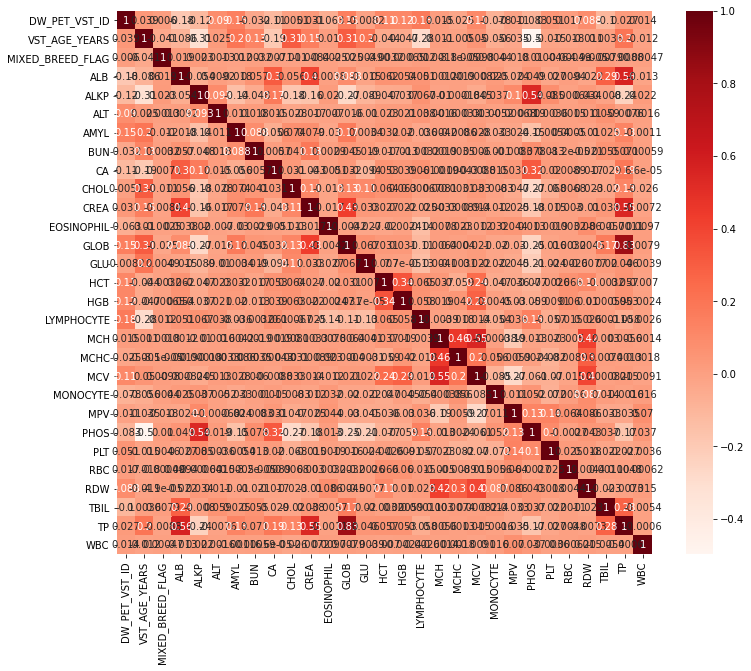

In [5]:
plt.figure(figsize=(12,10))
cor = data.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.Reds)
plt.show()

In [10]:
# Find k best features
selector = SelectKBest(f_classif, k=10)

selected_data = selector.fit_transform(X, y)
selected_features = pd.DataFrame(selector.inverse_transform(selected_data), 
                                 index=data.index, 
                                 columns=X.columns)

selected_columns = selected_features.columns[selected_features.var() != 0]
selected_features[selected_columns].head()

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,LBXSAL,LBXSAPSI,LBXSBU,LBXSCA,LBXSCH,LBXSCR,LBXSGL,LBXSPH,LBXSOSSI,LBXSTR
0,4.5,62.0,19.0,9.3,203.0,0.7,78.0,3.3,288.0,115.0
1,4.5,63.0,16.0,9.5,277.0,0.8,95.0,3.2,276.0,341.0
2,5.1,78.0,9.0,9.4,148.0,0.5,79.0,4.2,277.0,49.0
3,4.5,75.0,10.0,9.8,244.0,0.6,81.0,3.6,283.0,57.0
4,4.4,568.0,18.0,9.7,157.0,0.3,77.0,5.4,274.0,29.0


In [11]:
# Find k best features
selector = SelectKBest(f_classif, k=10)

selected_data = selector.fit_transform(X_pre, y_pre)
selected_features = pd.DataFrame(selector.inverse_transform(selected_data), 
                                 index=data.index, 
                                 columns=X_pre.columns)

selected_columns = selected_features.columns[selected_features.var() != 0]
selected_features[selected_columns].head()

/anaconda/envs/azureml_py36/lib/python3.6/site-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,LBXSAPSI,LBXSPH,kmeans_cluster_3,kmeans_cluster_4,pca_3,tsvd_4,srp_4,srp_9,srp_11,srp_14
0,86.0,3.8,2.0,0.0,9.623047,46.236736,-93.448187,33.712933,-9.722094,-10.283170
1,361.0,5.0,0.0,3.0,-261.228410,-198.312209,-226.510279,167.742397,-171.902099,-180.173135
2,80.0,3.1,1.0,1.0,-131.131149,-157.001551,-84.838571,-81.114187,50.787058,38.070946
3,73.0,4.1,2.0,0.0,24.300438,26.943483,-85.709207,33.229247,-19.492557,-23.318515
4,139.0,5.4,2.0,0.0,-38.233133,-3.913539,-116.423284,62.540634,-84.354885,-86.724948


In [2]:
data = pd.read_csv('data/data_test.csv')

In [8]:
df1 = data
# removing rows with more than % missing values
limitPer = len(df1.columns) * 0.5
df2 = df1.dropna(thresh=limitPer, axis=0) # thresh: Require that many non-NA values.
print("Number of Missing Columns: {}".format(limitPer))
print("Shape of Data Frame #1: {}".format(df1.shape))
print("Shape of Data Frame #2: {}".format(df2.shape))

Number of Missing Columns: 16.0
Shape of Data Frame #1: (140844, 32)
Shape of Data Frame #2: (128096, 32)


In [6]:
data['PHOS'].max()

69.55999755859375